# Exploratory Data Analysis
* **Author**: Winnie Zhang 
* BrainStation, Data Science
* Previous Notebook: 2. Feature Engineering 

## Introdution
In the previous notebook, we engineered a few features for our dataset. In this notebook, we will perform some exploratory data analysis.

I want to answer a few questions:
1. What is the distribution of the ratings before and after we binarize them?
2. Do users who leave more reviews give lower scores than those who don't?
3. Does game difficulty impact the rating?
4. Are certain words indicative of higher or lower rating scores?
5. Do certain categories, mechanics, or features of board games score higher?

First, I will load the packages and data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats

import joblib
from wordcloud import WordCloud

In [2]:
df = joblib.load("data/data_clean_ver2.pkl")

In [3]:
# sanity check
df.head()

,description,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,boardgameexpansion,boardgameimplementation,usersrated,...,Action / Dexterity,Movies / TV / Radio theme,Medieval,Players: Two Player Only Games,Crowdfunding: Kickstarter,rating,comment,number_of_reviews_by_user,avg_rating,comment_length
1,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,10.0,I tend to either love or easily tire of co-op ...,137,6.175182,76
2,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,10.0,This is an amazing co-op game. I play mostly ...,306,7.035948,62
3,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,10.0,Hey! I can finally rate this game I've been pl...,1411,5.974841,217
4,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,10.0,Love it- great fun with my son. 2 plays so far...,96,7.385417,16
5,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,10.0,"Fun, fun game. Strategy is required, but defin...",7,7.285714,99


## Exploratory Data Analysis
### Distribution of `rating`

First, I will look at the distribution of the `ratings` column. First, I will make this all into whole intgers. 

Since rounding rounds 0.5 down instead of up, I will add 0.01 to each score to ensure it rounds properly.

In [4]:
scores = np.array(df["rating"])
scores = scores + 0.01
df["rating"] = scores
df["rating"] = round(df["rating"])
df["rating"].head()

1    10.0
2    10.0
3    10.0
4    10.0
5    10.0
Name: rating, dtype: float64

Now, I will take a look at this distribution. I expect the ratings to be mostly high or low, as people are more likely to give reviewws if they're very happy or unsatisfied with something. 

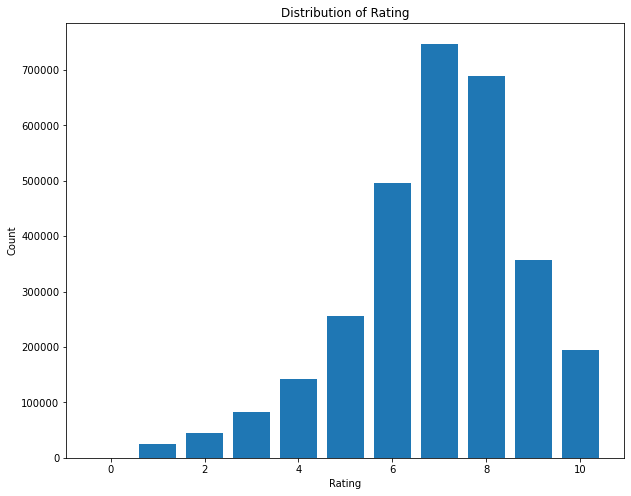

In [5]:
plt.figure(figsize=(10,8))
plt.bar(df["rating"].value_counts().index,
        df["rating"].value_counts().values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Rating")
plt.show()

Suprisingly, the majority of reviews is around the 7-8 range. 

Since I'm interested in evaluating the sentiment of the reviews, I will binarize `ratings`. If the rating is lower than 8, it will be considered a negative review (0), and if it's higher than 8, it will be considered a postiive review (1).

In [6]:
df_binarized = df.copy()

In [7]:

df_binarized["rating"] = np.where(df_binarized["rating"] >= 8, 1, 0)
df_binarized.head()

,description,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,boardgameexpansion,boardgameimplementation,usersrated,...,Action / Dexterity,Movies / TV / Radio theme,Medieval,Players: Two Player Only Games,Crowdfunding: Kickstarter,rating,comment,number_of_reviews_by_user,avg_rating,comment_length
1,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,1,I tend to either love or easily tire of co-op ...,137,6.175182,76
2,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,1,This is an amazing co-op game. I play mostly ...,306,7.035948,62
3,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,1,Hey! I can finally rate this game I've been pl...,1411,5.974841,217
4,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,1,Love it- great fun with my son. 2 plays so far...,96,7.385417,16
5,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,1,109006,...,0,0,0,0,0,1,"Fun, fun game. Strategy is required, but defin...",7,7.285714,99


Now, I will take a look at the distribution now that it's been binarized to see if the classes are balanced.

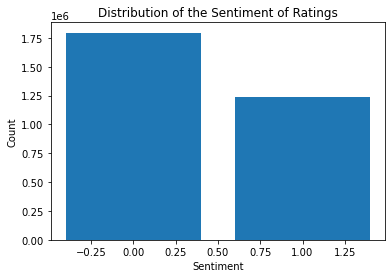

In [8]:
# distribution of reviews
plt.figure()
plt.bar(df_binarized["rating"].value_counts().index,
        df_binarized["rating"].value_counts().values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of the Sentiment of Ratings")
plt.show()

The classes aren't perfectly balanced, but they look close to being well-balanced. I will check the class-distribution.

In [9]:
values, counts = np.unique(df_binarized['rating'], return_counts=True)
normalized_counts = counts/counts.sum()
print(f"Class imbalance: {np.round(normalized_counts, 2)}")

Class imbalance: [0.59 0.41]


The class imbalance is 0.59 to 0.41. This is close enough to being balanced that I will not deal with the class imablance.

I will save this dataset.

In [10]:
# joblib.dump(df_binarized, "data/data_final.pkl")

### Reviews

#### Is there a difference in ratings given between those who leave comments and those who don't?
Next, I will further explore the data. I want to explore the original `reviews` dataframe to understand if there's a significant difference in the ratings given by people who leave comment versus those who don't.

First, I'll read in this data:

In [11]:
reviews = pd.read_csv("data/bgg-19m-reviews.csv")

# sanity check
reviews.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


Then, I'll mark all the null rows as 0 and all the rows with comments as 1.

In [12]:
reviews["comment"] = np.where(reviews["comment"].isna(), 0, 1)

In [13]:
# sanity check
reviews.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,0,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,1,30549,Pandemic
2,2,avlawn,10.0,1,30549,Pandemic
3,3,Mike Mayer,10.0,0,30549,Pandemic
4,4,Mease19,10.0,1,30549,Pandemic


I will now plot this:

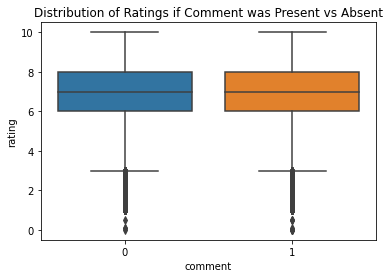

In [14]:
plt.figure()
sns.boxplot(x="comment", y="rating", data=reviews)
plt.title("Distribution of Ratings if Comment was Present vs Absent")
plt.show()

Surprisingly, the ratings are the same. I would have expected there to be a difference, as people who leave comments might have particularly strong positive or negative feelings about the game. However, it's important to keep in mind that some of the comments are just changes in the score, so this may be affecting what is seen here.

#### Do people who give more reviews give lower ratings?
I'm also interested in knowing if people who give more comments are more likely to give a more positive or negative review. For example, if someone leaves more comments, they might have more experience playing different board games, and therefore, have higher expecations, resulting in lower ratings by them.

In [15]:
reviews_clean = joblib.load("data/reviews_clean_final.pkl")

In [16]:
reviews_clean.head()

,index,user,rating,comment,ID,name
1,1,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
2,2,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
3,3,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
4,4,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic
5,5,calbearfan,10.0,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic


In [17]:
users = reviews.groupby("user").agg(count=("comment", "size"), 
                                          avg_rating=("rating", "mean")).reset_index()
# sanity check
users.head()

,user,count,avg_rating
0,Fu_Koios,2,9.000000
1,beastvol,9,7.333333
2,mycroft,14,7.521429
3,woh,5,7.400000
4,(mostly) harmless,1,9.000000


Now, I will look at the scatter plot between the number of reviews and average score.

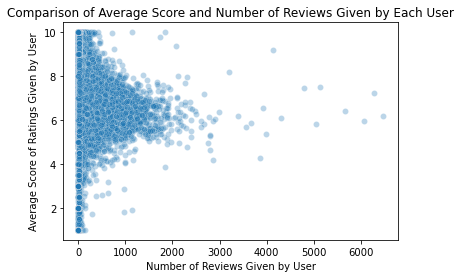

In [18]:
plt.figure()
sns.scatterplot(x="count", y="avg_rating", data=users, alpha=0.3)
plt.xlabel("Number of Reviews Given by User")
plt.ylabel("Average Score of Ratings Given by User")
plt.title("Comparison of Average Score and Number of Reviews Given by Each User")
plt.show()

By the looks of it, for the those who left only a few ratings, appear to have a wide range for scores, particularly concentrated on whole numbers. For those who leave more reviews, there seems to be a less wide range, with a range narrowing, the more reviews they give, and averaging out around the 7 mark.

Now, I will look at the distrbution of the average rating by users.

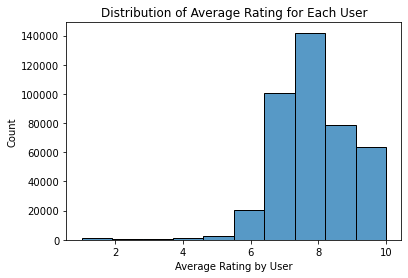

In [19]:
plt.figure()
sns.histplot(x="avg_rating", data=users, bins=10)
plt.xlabel("Average Rating by User")
plt.title("Distribution of Average Rating for Each User")
plt.show()

The average rating appears to be around 7, as observed in the previous graph.

Next, I will look at the distribution of the number of reviews a user gives.

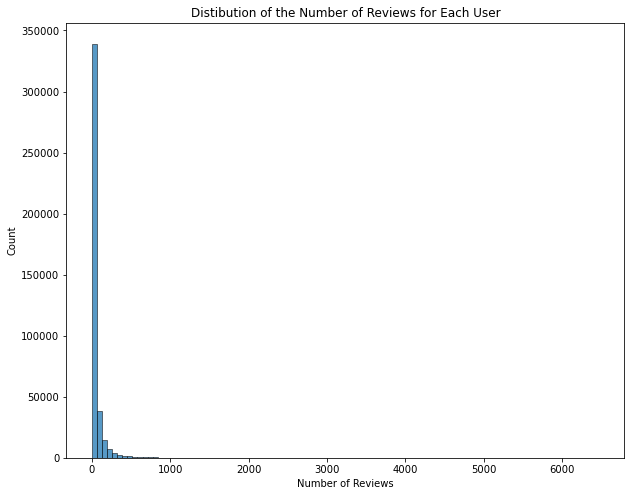

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(x="count", data=users, bins=100)
plt.xlabel("Number of Reviews")
plt.title("Distibution of the Number of Reviews for Each User")
plt.show()

### Difference in Sentiment for Ratings
But is there a difference in sentiment for people who leave more reviews vs those who don't?

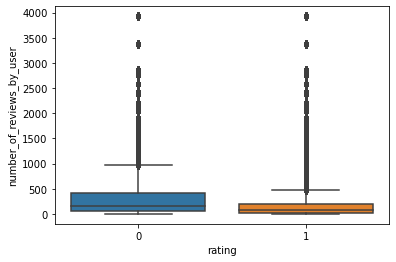

In [21]:
plt.figure()
sns.boxplot(x="rating", y="number_of_reviews_by_user", data=df_binarized)
plt.show()

The people who give positive scores tend to give fewer reviews.

### Games DataFrame
Next, I'm interested in exploring more about some of the features about the games. Since this information is now repeated several times due to being concatenated with `reviews`, I will look at the cleaned games dataframe.

In [22]:
games_clean = joblib.load("data/games_wrangled.pkl")

# sanity check
games_clean.head()

,id,primary,description,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,boardgameexpansion,...,Bluffing,Humor,Adventure,Deduction,Miniatures,Action / Dexterity,Movies / TV / Radio theme,Medieval,Players: Two Player Only Games,Crowdfunding: Kickstarter
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,8,1,...,0,0,0,0,0,0,0,0,0,0
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,30,45,7,1,...,0,0,0,0,0,0,0,1,0,0
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,60,120,10,1,...,0,0,0,0,0,0,0,0,0,0
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,10,1,...,0,0,0,0,0,0,0,0,0,0
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,13,1,...,0,0,0,0,0,0,0,1,0,0


#### Distribution of the Number of Ratings per Game
First, I will look at the distribution of the number of ratings per game.

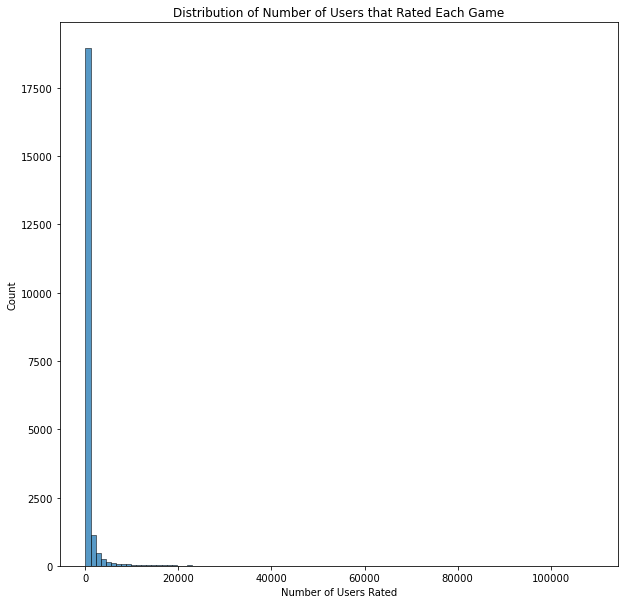

In [23]:
plt.figure(figsize=(10,10))
sns.histplot(x="usersrated", data=games_clean, bins=100)
plt.xlabel("Number of Users Rated")
plt.title("Distribution of Number of Users that Rated Each Game")
plt.show()

This distribution is highly right skewed. The majority seem to lie under 5000 users rated, but there are obviosuly some outliers with a lot more users rating the board game.

#### Distribution of the Number of Comments Per Game

Next, I will look at the distrbution of the number of comments.

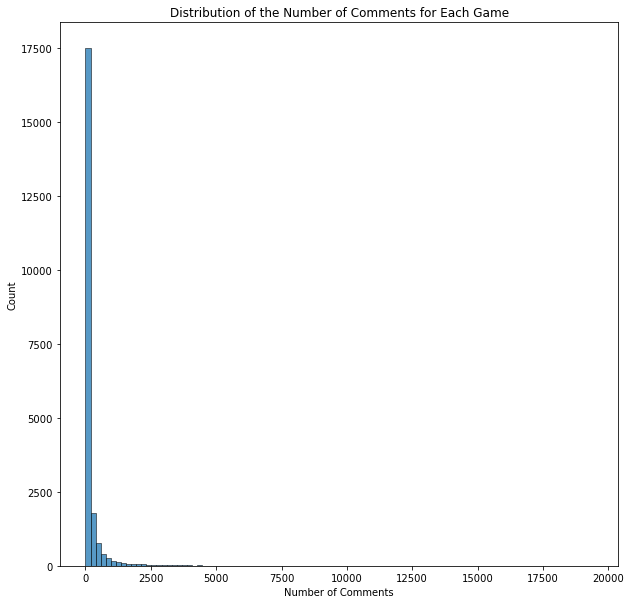

In [24]:
plt.figure(figsize=(10,10))
sns.histplot(x="numcomments", data=games_clean, bins=100)
plt.xlabel("Number of Comments")
plt.title("Distribution of the Number of Comments for Each Game")
plt.show()

This distribution is highly right skewed. The majority of games don't seem to have that many comments, with a few outliers with many comments.

#### Does the Difficulty of the Game Affect its Average Rating?

The column `averageweight` is the how difficult the game is, as rated by users. I am interested in seeing if there's a relationship with the rating of the game. For example, are more difficult games rated lower or higher?

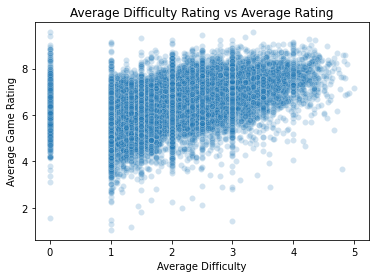

In [25]:
plt.figure()
sns.scatterplot(x="averageweight", y="average", data=games_clean, alpha=0.2)
plt.title("Average Difficulty Rating vs Average Rating")
plt.xlabel("Average Difficulty")
plt.ylabel("Average Game Rating")
plt.show()

There seems to be a somewhat positive relationship. I will see if this correlation is significant.

In [26]:
corr_coef, p_value = stats.pearsonr(games_clean["averageweight"], games_clean["average"])

print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

Correlation Coefficient: 0.48101200814964185
P-value: 0.0


The correlation coefficient is 0.481 and the p-value is less than 0.05, suggesting there is a positive correlation and that it's significant. Therefore, I will look at the `reviews_clean` column again and see if certain words that indicate the difficulty or ease of a game changes the rating.

In [27]:
reviews_words = reviews_clean.copy()

In [28]:
reviews_words["contains_difficult"] = np.where(reviews_words["comment"].str.contains("difficult"),
                                               1, 0)

In [29]:
reviews_words.head()

,index,user,rating,comment,ID,name,contains_difficult
1,1,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic,0
2,2,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic,0
3,3,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic,1
4,4,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic,0
5,5,calbearfan,10.0,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic,0


The rating appears to be the same. What if I look at the word "easy"?

In [30]:
reviews_words[reviews_words["comment"].str.contains("easy")]
reviews_words["contains_easy"] = np.where(reviews_words["comment"].str.contains("easy"), 1, 0)
reviews_words.head()

,index,user,rating,comment,ID,name,contains_difficult,contains_easy
1,1,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic,0,0
2,2,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic,0,0
3,3,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic,1,1
4,4,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic,0,0
5,5,calbearfan,10.0,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic,0,0


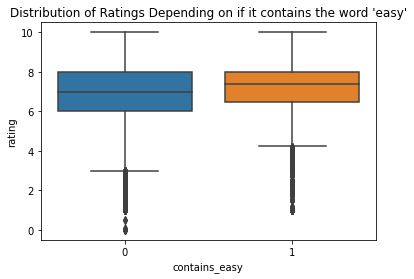

In [31]:
plt.figure()
sns.boxplot(x="contains_easy", y="rating", data=reviews_words)
plt.title("Distribution of Ratings Depending on if it contains the word 'easy'")
plt.show()

The median of reviews that contain the word "easy" is higher. This is quite surprising, as the previous graph would suggest the opposite is true, where more difficult games would be higher rated. This might be because we're losing the context of the whole review. For example, it could be that the review states the game is "not easy" to learn, but we don't see this since we're only looking for the word "easy".

But, is this slight difference significant? I will look at  median when considering this, using the Mann-Whitney U test.

In [32]:
# all the ratings without the word easy
no_easy = reviews_words[reviews_words["contains_easy"]==0]["rating"]
no_easy.head()

1    10.0
2    10.0
4    10.0
5    10.0
6    10.0
Name: rating, dtype: float64

In [33]:
# all the ratings that contain the word easy
yes_easy = reviews_words[reviews_words["contains_easy"]==1]["rating"]
yes_easy.head()

3      10.0
36     10.0
70     10.0
132    10.0
150    10.0
Name: rating, dtype: float64

Now, I will test if the differences in the median is significant.

In [34]:
stats.mannwhitneyu(yes_easy, no_easy)

MannwhitneyuResult(statistic=212532688409.0, pvalue=0.0)

The p-value is less than 0, meaning that the difference is significant. I will also look to see if there difference in the mean is significant.

In [35]:
stats.ttest_ind(yes_easy, no_easy)

Ttest_indResult(statistic=84.63103241735139, pvalue=0.0)

The p-value is also less than 0, meaning this is significant.

Mood's test for median's

In [54]:
stat, p, med, tbl = stats.median_test(yes_easy, no_easy)

In [55]:
p

0.0

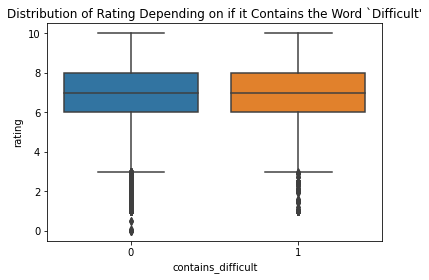

In [36]:
plt.figure()
sns.boxplot(x="contains_difficult", y="rating", data=reviews_words)
plt.title("Distribution of Rating Depending on if it Contains the Word `Difficult'")
plt.show()

But what about the sentiment instead of just reviews?

In [37]:
reviews_words2 = reviews_words.copy()
scores = np.array(reviews_words2["rating"])
scores = scores + 0.01
reviews_words2["rating"] = scores
reviews_words2["rating"] = round(reviews_words2["rating"])
reviews_words2["rating"].head()
reviews_words2["rating"] = np.where(reviews_words2["rating"] >= 8, 1, 0)
reviews_words2.head()

,index,user,rating,comment,ID,name,contains_difficult,contains_easy
1,1,avlawn,1,I tend to either love or easily tire of co-op ...,30549,Pandemic,0,0
2,2,Mease19,1,This is an amazing co-op game. I play mostly ...,30549,Pandemic,0,0
3,3,cfarrell,1,Hey! I can finally rate this game I've been pl...,30549,Pandemic,1,1
4,4,gregd,1,Love it- great fun with my son. 2 plays so far...,30549,Pandemic,0,0
5,5,calbearfan,1,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic,0,0


In [38]:
sentiment_for_easy = reviews_words2.\
    groupby(reviews_words2["contains_easy"])["rating"].value_counts()
sentiment_for_easy.head()

contains_easy  rating
0              0         1732090
               1         1177784
1              0           64628
               1           63969
Name: rating, dtype: int64

In [39]:
sentiment_for_easy = pd.DataFrame(sentiment_for_easy)
sentiment_for_easy.columns = ["Count"]
sentiment_for_easy = sentiment_for_easy.reset_index()

In [40]:
sentiment_for_easy.head()

,contains_easy,rating,Count
0,0,0,1732090
1,0,1,1177784
2,1,0,64628
3,1,1,63969


In [41]:
# pivot positive and negative counts on same row
sentiment_for_easy = sentiment_for_easy.pivot(index="contains_easy", columns="rating", 
                                              values="Count").reset_index()
sentiment_for_easy.head()

rating,contains_easy,0,1
0,0,1732090,1177784
1,1,64628,63969


<BarContainer object of 2 artists>

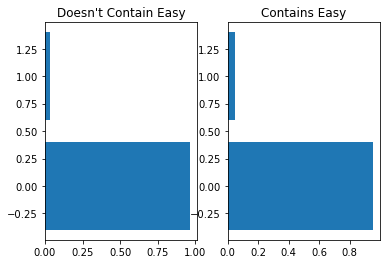

In [42]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.title("Doesn't Contain Easy")
plt.barh(sentiment_for_easy["contains_easy"],
         sentiment_for_easy[0]/(1732090 + 64628))
plt.subplot(1, 2, 2)
plt.title("Contains Easy")
plt.barh(sentiment_for_easy["contains_easy"],
         sentiment_for_easy[1]/(1177784 + 63969))

The distribution of the sentiment ratings for those that contain easy and don't contain easy appear to be the same.

#### Are there other words from the reviews that are indicative of the rating the game may get?

I will look at other words as well, such as "fun".

In [43]:
reviews_words[reviews_words["comment"].str.contains("fun")]
reviews_words["contains_fun"] = np.where(reviews_words["comment"].str.contains("fun"), 1, 0)
reviews_words.head()

,index,user,rating,comment,ID,name,contains_difficult,contains_easy,contains_fun
1,1,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic,0,0,0
2,2,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic,0,0,0
3,3,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic,1,1,0
4,4,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic,0,0,1
5,5,calbearfan,10.0,"Fun, fun game. Strategy is required, but defin...",30549,Pandemic,0,0,1


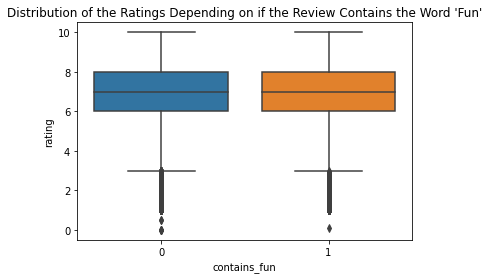

In [44]:
plt.figure()
sns.boxplot(x="contains_fun", y="rating", data=reviews_words)
plt.title("Distribution of the Ratings Depending on if the Review Contains the Word 'Fun'")
plt.show()

I will also look at the word "boring". I expect the reviews with the word boring to rate lower.

In [45]:
reviews_words["contains_boring"] = np.where(reviews_words["comment"].str.contains("boring"), 1, 0)

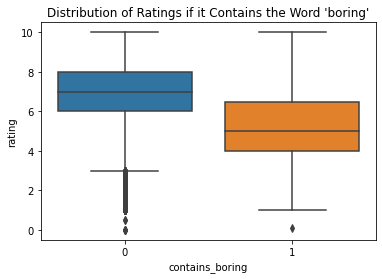

In [46]:
plt.figure()
sns.boxplot(x="contains_boring", y="rating", data=reviews_words)
plt.title("Distribution of Ratings if it Contains the Word 'boring'")
plt.show()

There is a large difference! The median and the distribution of the ratings is much lower if the reviews contain the word "boring". I will test if the difference in the mean and median are significant.

In [47]:
# all the ratings without the word boring
no_boring = reviews_words[reviews_words["contains_boring"]==0]["rating"]
no_boring.head()

1    10.0
2    10.0
3    10.0
4    10.0
5    10.0
Name: rating, dtype: float64

In [48]:
# all the ratings that contain the word boring
yes_boring = reviews_words[reviews_words["contains_boring"]==1]["rating"]
yes_boring.head()

114    10.0
170    10.0
187    10.0
331    10.0
825    10.0
Name: rating, dtype: float64

Now, I will test if the differences in the median is significant.

In [49]:
stats.mannwhitneyu(yes_boring, no_boring)

MannwhitneyuResult(statistic=27590219027.5, pvalue=0.0)

The p-value is less than 0, meaning that the difference is significant. I will also look to see if there difference in the mean is significant.

In [50]:
stats.ttest_ind(yes_boring, no_boring)

Ttest_indResult(statistic=-194.12858081925575, pvalue=0.0)

#### Do certain categories/families/mechanics receiving higher or lower ratings?

Next, I will look at some of the board game categories to see if they ratings change depending on if they're labelled as that category or not. What are some of the categories I'm interested in? 

Based on data cleaning, these categories look interesting: 

In [51]:
cat_list = ['Card Game', 'Wargame', 'Fantasy', 'Party Game', 'Dice', 'Science Fiction', 'Fighting',
            "Children's Game", 'Abstract Strategy', 'Economic', 'Animals', 'World War II',
            'Bluffing', 'Humor', 'Adventure', 'Deduction', 'Miniatures', 'Action / Dexterity',
            'Movies / TV / Radio theme', 'Medieval', 'Players: Two Player Only Games', 
            'Crowdfunding: Kickstarter']

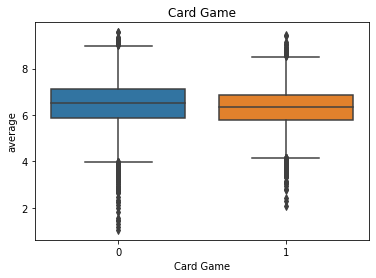

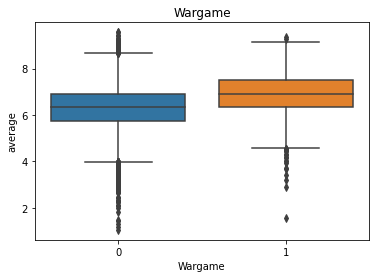

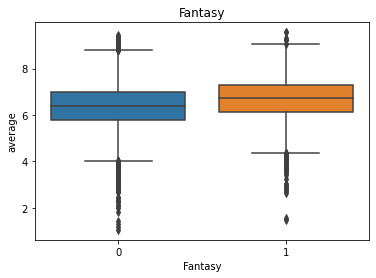

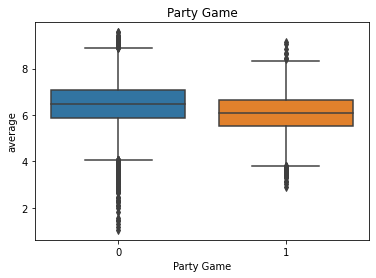

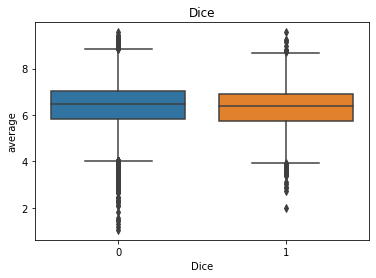

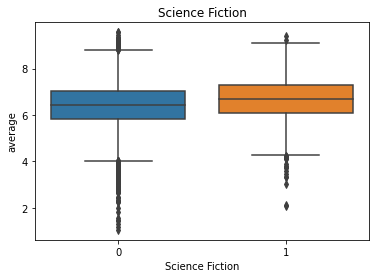

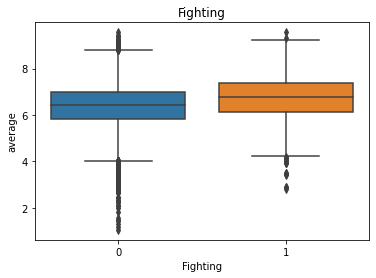

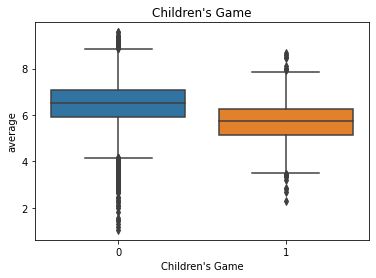

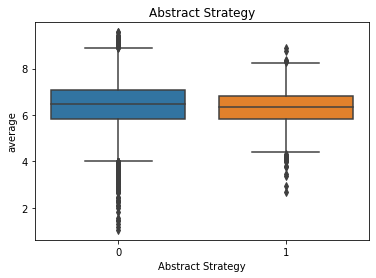

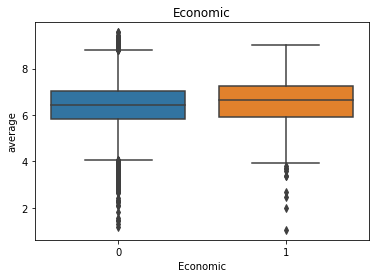

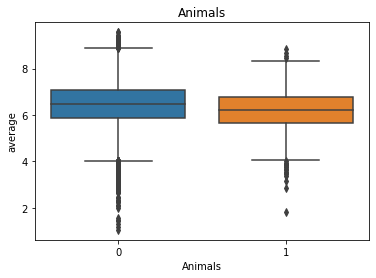

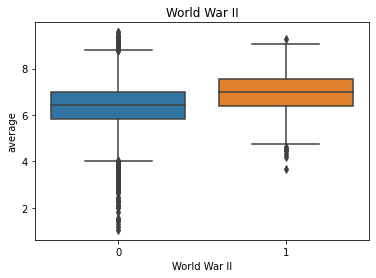

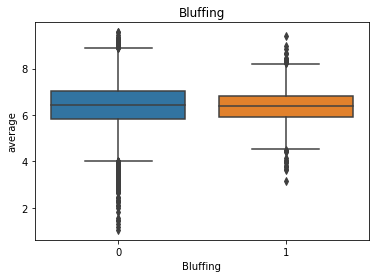

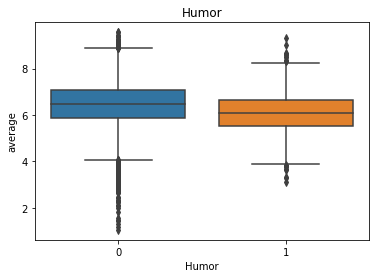

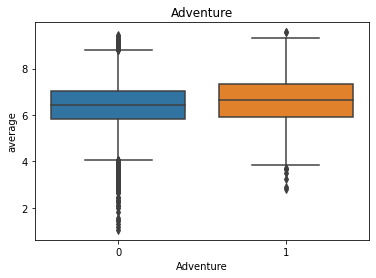

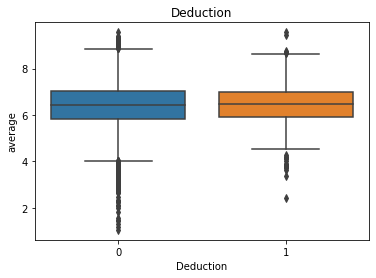

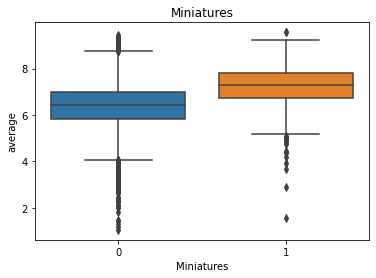

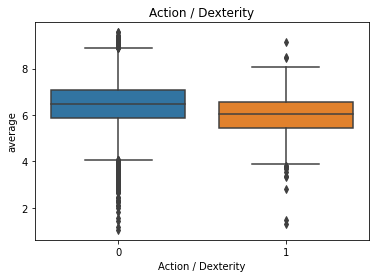

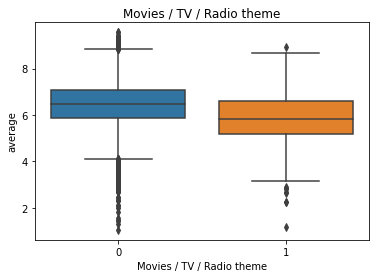

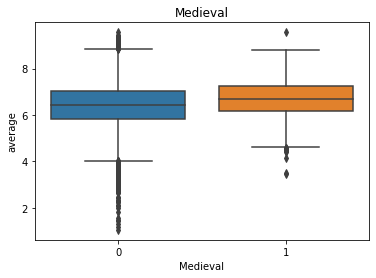

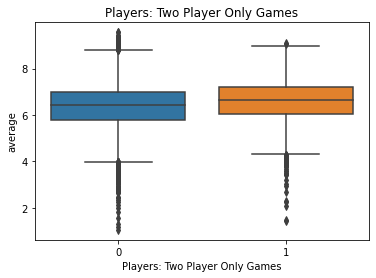

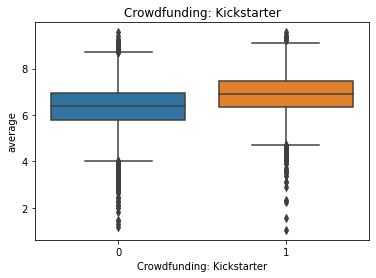

In [120]:
for cat in cat_list:
    plt.figure()
    sns.boxplot(x=cat, y="average", data=games_clean)
    plt.title(cat)
    plt.show()

Based on this, it appears that board games that fall under these categories have a lower average score: 
- Party Game
- Children's Game
- Animals
- Humour 
- Action/Dexterity
- Moves/TV/Radio theme

Board games that fall under these categories have a higher average score: 
- War game 
- Fantasy
- Fighting
- World War II
- Minatures
- Medieval
- Players: 2 Player Only Games
- Crowdfunding: KickStarter

However, it's important to keep in mind that a board game can fall under more than 1 category, so this may be skewing the results here, as for example, a board game can have "Minatures", which is rated higher, but it can also be a "Party Game", which is more lowly rated.

### What are the most common words used in reviews and descriptions?

I'm going to visualize the most common words used in reviews and descriptions is a word cloud, where bigger the word, the more often the word appears in the dataset.

This code is borrowed from [Andrew Dang](https://github.com/andrew-dang/whisky_predictions/blob/main/2_EDA_and_Feature_Engineering.ipynb)

In [ ]:
# combine all reviews into a text to create wordcloud
text = " ".join(review for review in reviews_clean['comment'])
print(f'There are {len(text)} words in the combination of all reviews')

# create the wordcloud
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The wirds that stand out are "game", "play", "one", and "lot". These don't really add much value as they don't mean much, as you do play board games.

Next, I will create a wordcloud for the `description` of the games.

There is 1 NaN row in `games_clean`. I will drop it.

In [ ]:
games_copy = games_clean.drop(15338, axis=0)

In [ ]:
# combine all gamess into a text to create wordcloud
text = " ".join(games for games in games_copy['description'])
print(f'There are {len(text)} words in the combination of all gamess')

# create the wordcloud
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Based on this, "card" stands out. Card Game tend to be popular and so taking turns and battling.

# Conclusion:
In this notebook, we checked the distribution of ratings for both the reviews and boardgames, looked at the most common words in the dataset, and if certain words in a review indicate a lower or higher rating.

We also saved this dataset after binarizing `ratings` into 0 for a negative sentiment and 0 for a positive sentiment.

**Next Notebook**: 4. Modelling
- Vectorize (process text into numerical representations) test
- Make models and optimize hyperparameters